# **<span style="color:#467EB9;">⚙️ Importing Libraries</span>**

In [1]:
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetV2L
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers, losses
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random
import os
import re

# **<span style="color:#F4AE4B;">🔎 Get Dataset Statistics</span>**

In [2]:
dataset_statistics = []
total_images = 0

for dir_path, dir_names, file_names in os.walk('datasets'):

    if dir_path != 'datasets':
        crops_name = re.findall('datasets/(.*)', dir_path)[0]
        crops_images_total = len(file_names)

        dataset_statistics.append([crops_name, crops_images_total])
        total_images += crops_images_total

display(pd.DataFrame(dataset_statistics, columns=['crops_name', 'total_images']))

,crops_name,total_images
0,gram,25
1,sugarcane,25
2,Tobacco-plant,33
3,Lemon,28
4,rice,29
5,Pearl_millet(bajra),39
6,cotton,32
7,Cucumber,31
8,chilli,23
9,Cherry,32


<div class="alert alert-block alert-info"> 📌  There are 829 total images and 30 crops category</div>

# **<span style="color:#F4AE4B;">🎨 Visualize Sample Images</span>**

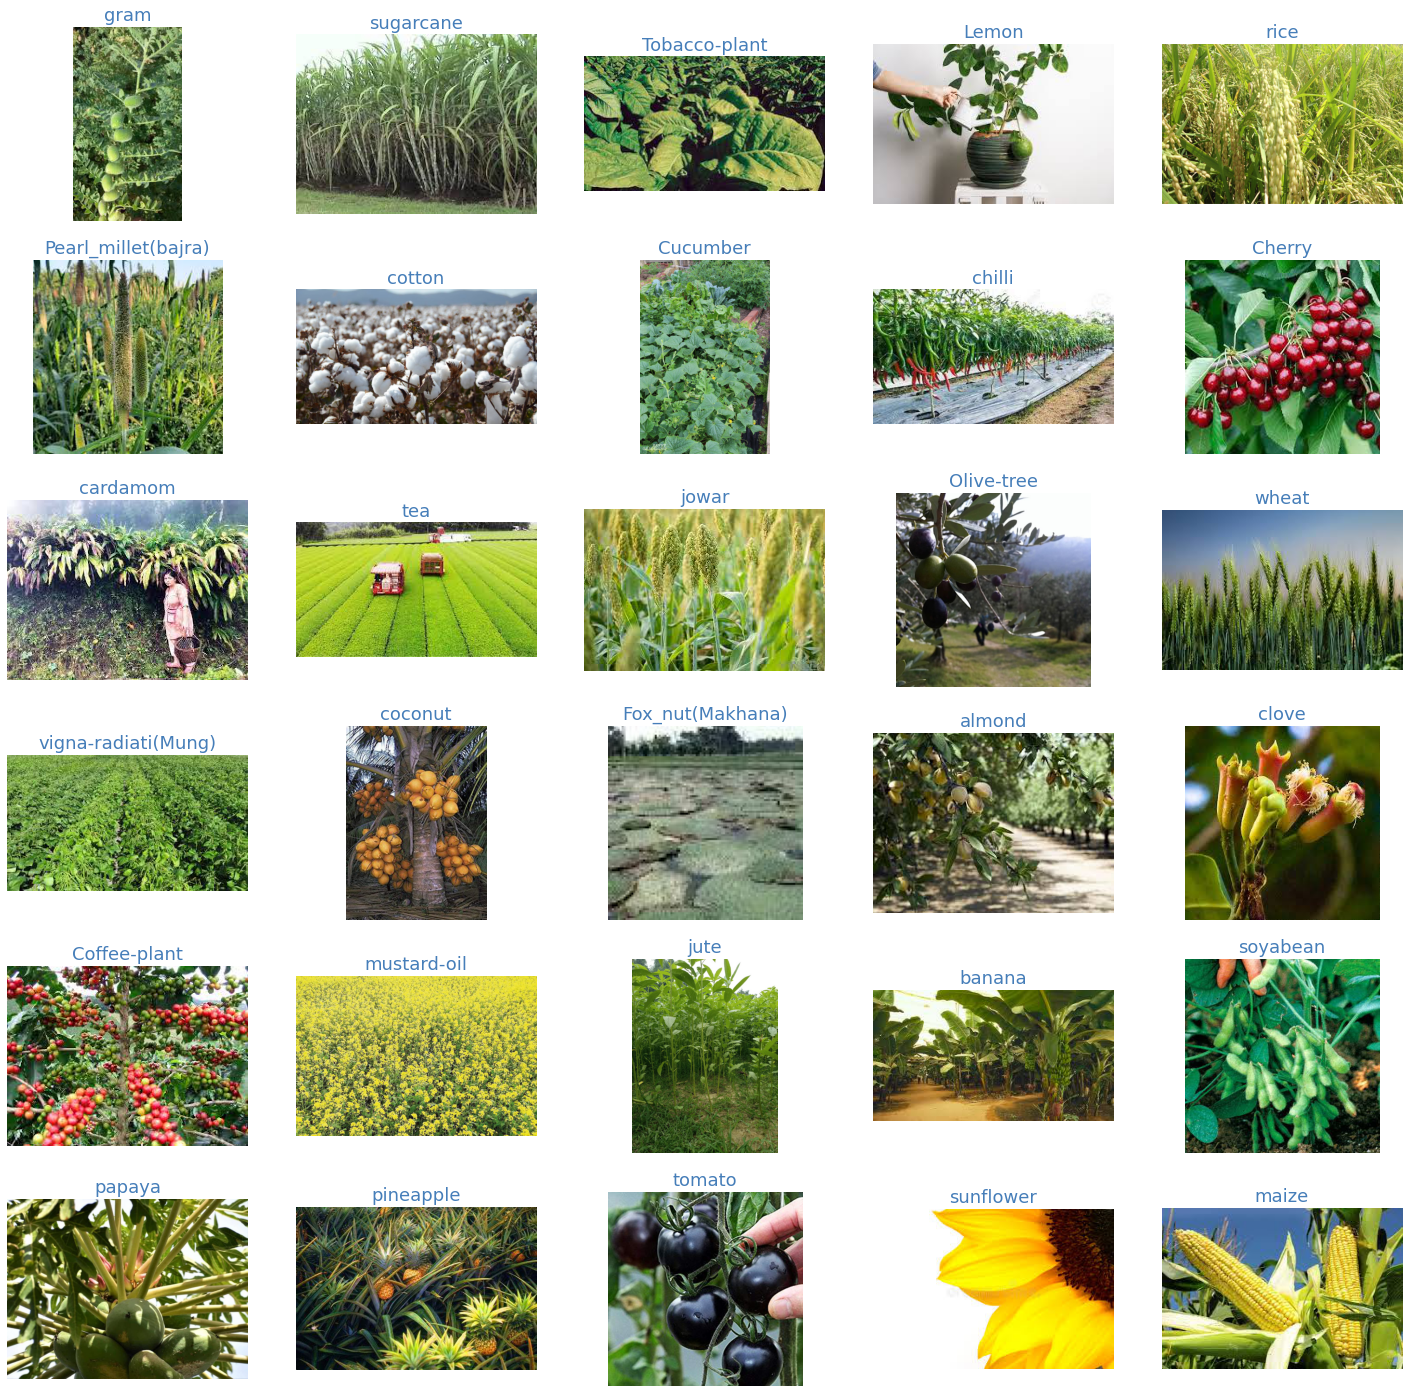

In [3]:
image_title = []
sample_image_path = []

for dir_path, dir_names, file_names in os.walk('datasets'):

    if dir_path != 'datasets':
        crops_name = re.findall('datasets/(.*)', dir_path)[0]
        random_sample_image_path = '{}/{}'.format(dir_path, random.choice(file_names))
        image_title.append(crops_name)
        sample_image_path.append(random_sample_image_path)

plt.figure(figsize=(25, 25))

for i in range(len(image_title)):
    plt.subplot(6, 5, i+1)
    img = mpimg.imread(sample_image_path[i])
    plt.title(image_title[i], color="#467EB9", fontsize=18)
    plt.imshow(img)
    plt.axis('off')

plt.show()

# **<span style="color:#467EB9;">⚙️ Preprocessing Images For Training & Validation</span>**

In [4]:
train = ImageDataGenerator(
            horizontal_flip=True,
#             vertical_flip=True,
#             rescale=1/255,
            validation_split=0.1,
#             shear_range=0.1,
            zoom_range=0.2,
            width_shift_range=0.2,
            height_shift_range=0.2,
            rotation_range=20,
        ).flow_from_directory(
            directory='datasets',
            target_size=(299,299),
            subset='training'
        )

valid = ImageDataGenerator(
            validation_split=0.1,
        ).flow_from_directory(
            directory='datasets',
            target_size=(299,299),
            subset='validation'
        )

Found 757 images belonging to 30 classes.
Found 72 images belonging to 30 classes.


# **<span style="color:#467EB9;">⚙️ Initialize Model Using Pre-trained ResNet50V2</span>**

In [9]:
base_model = EfficientNetV2L(include_top = False, input_shape=(299,299,3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
#     Dense(1024, activation='softmax'),
#     Dropout(0.15),
    Dense(30, activation='softmax')
])

opt = optimizers.Adam(learning_rate=0.01)

model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-l (Functiona  (None, 10, 10, 1280)     117746848 
 l)                                                              
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 30)                38430     
                                                                 
Total params: 117,785,278
Trainable params: 38,430
Non-trainable params: 117,746,848
_________________________________________________________________


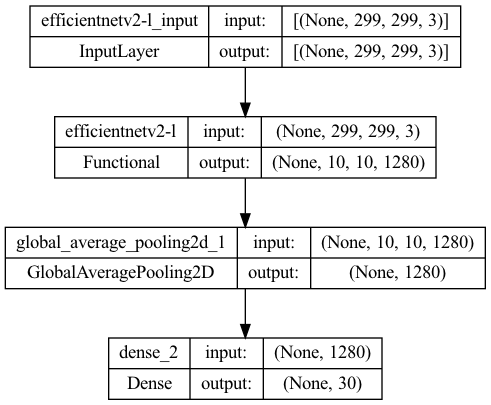

In [10]:
plot_model(model, show_shapes=True, show_layer_names=True)

# **<span style="color:#F4AE4B;">🚀 Training Model</span>**

In [11]:
batch_size = 32
epochs = 100

# steps_per_epoch = train.n
steps_per_epoch = 24
validation_steps = valid.n

print("steps_per_epoch :", steps_per_epoch)
print("validation_steps :", validation_steps)

steps_per_epoch : 24
validation_steps : 72


In [12]:
filepath = "./best_model.h5"

cp = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')
callback_list = [cp]

history = model.fit(
            train, 
            epochs=epochs, 
            steps_per_epoch=steps_per_epoch, 
            validation_data=valid, 
            validation_steps=validation_steps,
            callbacks=callback_list,
        )

Epoch 1/100
24/24 [==============================] - ETA: 0s - loss: 2.2241 - accuracy: 0.3976 WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 72 batches). You may need to use the repeat() function when building your dataset.

Epoch 1: accuracy improved from -inf to 0.39762, saving model to ./best_model.h5
24/24 [==============================] - 423s 17s/step - loss: 2.2241 - accuracy: 0.3976 - val_loss: 1.3862 - val_accuracy: 0.5556
Epoch 2/100
24/24 [==============================] - ETA: 0s - loss: 1.1788 - accuracy: 0.6565 
Epoch 2: accuracy improved from 0.39762 to 0.65654, saving model to ./best_model.h5
24/24 [==============================] - 358s 15s/step - loss: 1.1788 - accuracy: 0.6565
Epoch 3/100
24/24 [==============================] - ETA: 0s - loss: 0.8187 - accuracy: 0.7477 
Epoch 3: accuracy improved from 0.65654 to 0.74769, saving mo

24/24 [==============================] - ETA: 0s - loss: 0.1776 - accuracy: 0.9511 
Epoch 32: accuracy did not improve from 0.95509
24/24 [==============================] - 286s 12s/step - loss: 0.1776 - accuracy: 0.9511
Epoch 33/100
24/24 [==============================] - ETA: 0s - loss: 0.1644 - accuracy: 0.9458 
Epoch 33: accuracy did not improve from 0.95509
24/24 [==============================] - 283s 12s/step - loss: 0.1644 - accuracy: 0.9458
Epoch 34/100
24/24 [==============================] - ETA: 0s - loss: 0.1508 - accuracy: 0.9551 
Epoch 34: accuracy did not improve from 0.95509
24/24 [==============================] - 284s 12s/step - loss: 0.1508 - accuracy: 0.9551
Epoch 35/100
24/24 [==============================] - ETA: 0s - loss: 0.1238 - accuracy: 0.9643 
Epoch 35: accuracy improved from 0.95509 to 0.96433, saving model to ./best_model.h5
24/24 [==============================] - 282s 12s/step - loss: 0.1238 - accuracy: 0.9643
Epoch 36/100
24/24 [====================

24/24 [==============================] - 311s 13s/step - loss: 0.0885 - accuracy: 0.9762
Epoch 67/100
24/24 [==============================] - ETA: 0s - loss: 0.0994 - accuracy: 0.9723 
Epoch 67: accuracy did not improve from 0.97886
24/24 [==============================] - 310s 13s/step - loss: 0.0994 - accuracy: 0.9723
Epoch 68/100
24/24 [==============================] - ETA: 0s - loss: 0.1022 - accuracy: 0.9630 
Epoch 68: accuracy did not improve from 0.97886
24/24 [==============================] - 310s 13s/step - loss: 0.1022 - accuracy: 0.9630
Epoch 69/100
24/24 [==============================] - ETA: 0s - loss: 0.1212 - accuracy: 0.9590 
Epoch 69: accuracy did not improve from 0.97886
24/24 [==============================] - 314s 13s/step - loss: 0.1212 - accuracy: 0.9590
Epoch 70/100
24/24 [==============================] - ETA: 0s - loss: 0.1196 - accuracy: 0.9630 
Epoch 70: accuracy did not improve from 0.97886
24/24 [==============================] - 313s 13s/step - loss: 0

# **<span style="color:#467EB9;">📊 Model Evaluation</span>**

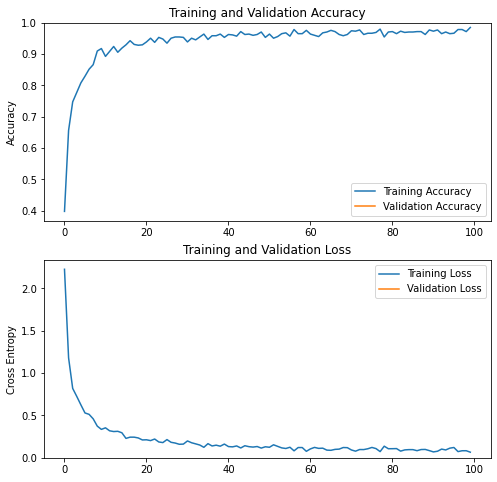

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()